PCA = Principal Component Analysis = dimensionality reduction

For a physicist PCA is just like fitting an ellipse centered at some centroid (the arithmetic mean) and examining major axes of that ellipse. So to get this centroid we need to subtract the mean of the data from each data vector. 


$$ \hat{x} = \frac{1}{N} \sum{\vec{x_i}}$$ 

Centred data matrix := $\hat{X}$

$$ \hat{X} = DATA~Matrix - Mean $$


The next step is to calculate the covariance matrix of the centered data matrix. 
Then calculate the eigendecomposition of the covariance matrix -> results in a list of eigenvalues and a list of eigenvectors (eigenvectors of $ \hat{X}^{T} \hat{X} ~ / (N-1) ~ or ~ (N) $ )


Finally, if there are eigenvalues close to zero, they represent components that may be discarded.


In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import dot
from numpy import random
from numpy import sqrt
import matplotlib.pyplot as pyplot

Let's start with something simple, first of all we need some data to showcase PCA

In [2]:
random_state = random.RandomState(1)
number_of_points = 500
X = dot(random_state.rand(2, 2), random_state.randn(2, number_of_points)).T

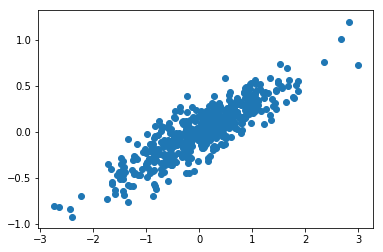

In [3]:
pyplot.scatter(X[:, 0], X[:, 1])

In [4]:
# so we have two columns (two features), 500 examples
# this is a very limited example as in real-life in general we have large numbers of dimensions 
# but let's just go with this exampe to make things extremely simple

First of all, we need mean values of each column and center the values

In [5]:
# calculate the mean of each column
Mean_vector = mean(X.T, axis=1)
print(Mean_vector)

[0.03614626 0.00675995]


In [6]:
# center the values

In [7]:
# center columns by subtracting column means
CenteredX = X - Mean_vector

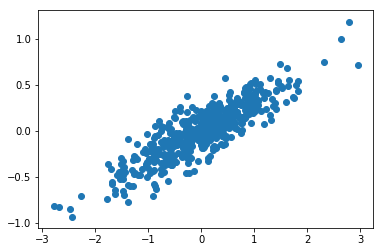

In [8]:
pyplot.scatter(CenteredX[:, 0], CenteredX[:, 1])

In [9]:
# now we can calculate the covariance matrix
CovMatrix = cov(CenteredX.T)

In [10]:
print(CovMatrix)

[[0.68254944 0.2115691 ]
 [0.2115691  0.08732276]]


In [11]:
CovMatrix2 = dot(CenteredX.T, CenteredX) /(number_of_points-1) #in numpy N-1 is the default 

In [12]:
print(CovMatrix2)

[[0.68254944 0.2115691 ]
 [0.2115691  0.08732276]]


In [13]:
# make eigendecomposition of covariance matrix
values, vectors = eig(CovMatrix)

In [14]:
print(vectors)

[[ 0.95263898 -0.30410356]
 [ 0.30410356  0.95263898]]


In [15]:
print(values)

[0.750087  0.0197852]


To see what these numbers mean, 
let's plot them as vectors over the data
I will use "components" to define the direction of the vector
and values to define the squared-length of the vector

(-3.028898699591075, 3.281407460187606, -1.044489047876517, 1.3179881318832734)

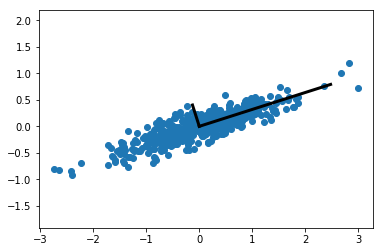

In [16]:

pyplot.scatter(X[:, 0], X[:, 1])

for e, v in zip(values, vectors.T):
    pyplot.plot([0, 3*sqrt(e)*v[0]], [0, 3*sqrt(e)*v[1]], 'k-', lw=3) 
                   # By multiplying sigma with 3 we cover approximately 99.7 %
                   # of the points according to the three sigma rule 
pyplot.axis('equal')

cool, so now you kno how PCA works, it's just like fitting a multidimension ellipse and examining major axes of that ellipse. If we see that axis is small meaning that variance is small so we can discard this component.

good explanation:: https://en.wikipedia.org/wiki/Principal_component_analysis